In [97]:
# Import Libraries and Load Data from URL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime
url = "https://raw.githubusercontent.com/Sayalinale/Data-Prep-Trends/refs/heads/main/raw_sales_data.csv"
df = pd.read_csv(url)

# Show initial data
df.head()

,Order_ID,Customer_Name,Email,Phone,Product_Category,Order_Date,Revenue,Discount (%)
0,101,John Doe,john@email.com,9.876543e+09,Electronics,12/31/2023,1200,10.0
1,102,Alice Smith,NaN,9.898990e+09,Clothing,01-05-24,500,NaN
2,103,Bob Miller,bob@email.com,NaN,Electronics,12-01-24,3000,20.0
3,104,John Doe,john@email.com,9.876543e+09,Electronics,12/31/2023,1200,10.0
4,105,David White,david@email.com,9.123457e+09,Furniture,02-15-2024,2500,15.0


In [98]:
# Fill missing values
df['Email'] = df['Email'].fillna('not_provided@email.com')
df['Discount (%)'] = df['Discount (%)'].fillna(0)
df['Phone'] = df['Phone'].fillna('Unknown')
df = df.drop_duplicates(subset='Customer_Name', keep='first')

In [99]:
# Preview cleaned data
print("Cleaned Data Preview:")
print(df)

Cleaned Data Preview:
   Order_ID Customer_Name                   Email         Phone  \
0       101      John Doe          john@email.com  9876543210.0   
1       102   Alice Smith  not_provided@email.com  9898989898.0   
2       103    Bob Miller           bob@email.com       Unknown   
4       105   David White         david@email.com  9123456789.0   
5       106    Emma Brown          emma@email.com  9234567890.0   
6       107   Chris Green  not_provided@email.com  9345678901.0   

  Product_Category  Order_Date  Revenue  Discount (%)  
0      Electronics  12/31/2023     1200          10.0  
1         Clothing    01-05-24      500           0.0  
2      Electronics    12-01-24     3000          20.0  
4        Furniture  02-15-2024     2500          15.0  
5         Clothing    08-03-24      700           5.0  
6        Furniture    04-10-24     1800          25.0  


In [100]:
# Clean the column to string type
dates = df['Order_Date'].astype(str)

formats = [
    '%m/%d/%Y',  # 12/31/2023
    '%d-%m-%Y',  # 31-12-2023
    '%m-%d-%Y',  # 12-31-2023
    '%d/%m/%Y',  # 31/12/2023
    '%Y/%m/%d',  # 2023/12/31
    '%Y-%m-%d',  # 2023-12-31
    '%d-%m-%y',  # 01-05-24 (added this format for 2-digit year)
    '%m-%d-%y',  # 05-01-24 (added another common 2-digit year format)
    '%d/%m/%y',  # 01/05/24 (added slash version with 2-digit year)
    '%m/%d/%y'   # 05/01/24 (added another slash version with 2-digit year)
]

# Custom parser that tries all formats and returns NaT if no format matches
def parse_date(x):
    for fmt in formats:
        try:
            return datetime.strptime(x.strip(), fmt)
        except:
            continue
    # Return NaT (Not a Time) or raise a more informative error
    return pd.NaT  # Changed from reusing the last format to returning NaT

# Apply parser
df['Order_Date'] = df['Order_Date'].apply(parse_date)

# Format to ISO string (only for valid dates)
df['Order_Date'] = df['Order_Date'].dt.strftime('%Y-%m-%d')

# Done!
print(df)

   Order_ID Customer_Name                   Email         Phone  \
0       101      John Doe          john@email.com  9876543210.0   
1       102   Alice Smith  not_provided@email.com  9898989898.0   
2       103    Bob Miller           bob@email.com       Unknown   
4       105   David White         david@email.com  9123456789.0   
5       106    Emma Brown          emma@email.com  9234567890.0   
6       107   Chris Green  not_provided@email.com  9345678901.0   

  Product_Category  Order_Date  Revenue  Discount (%)  
0      Electronics  2023-12-31     1200          10.0  
1         Clothing  2024-05-01      500           0.0  
2      Electronics  2024-01-12     3000          20.0  
4        Furniture  2024-02-15     2500          15.0  
5         Clothing  2024-03-08      700           5.0  
6        Furniture  2024-10-04     1800          25.0  


In [101]:
df.to_csv(r'D:\Sayali\Job Applications\UpTrail Internship\Week 2\Sales_cleaned.csv', index=False)

In [102]:
revenue_by_category = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
print(revenue_by_category)


Product_Category
Furniture      4300
Electronics    4200
Clothing       1200
Name: Revenue, dtype: int64


In [103]:
avg_discount_by_customer = df.groupby('Customer_Name')['Discount (%)'].mean().sort_values(ascending=False)
print(avg_discount_by_customer)

Customer_Name
Chris Green    25.0
Bob Miller     20.0
David White    15.0
John Doe       10.0
Emma Brown      5.0
Alice Smith     0.0
Name: Discount (%), dtype: float64


In [105]:
# Make sure Order_Date is datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Extract Year-Month
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

# Group by month and sum revenue
monthly_sales = df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Convert YearMonth back to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

print(monthly_sales)


  YearMonth  Revenue
0   2023-12     1200
1   2024-01     3000
2   2024-02     2500
3   2024-03      700
4   2024-05      500
5   2024-10     1800


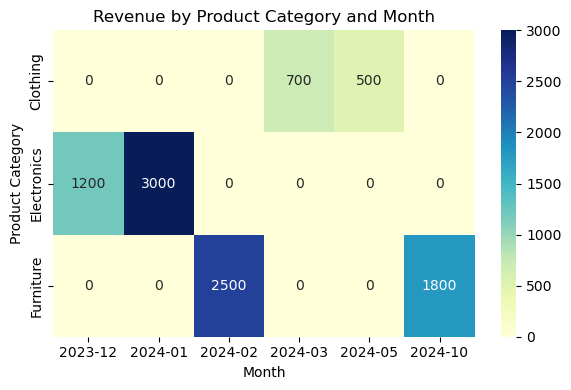

In [87]:
# Ensure Order_Date is in datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Extract Year-Month
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)

# Create pivot table
heatmap_data = df.pivot_table(
    index='Product_Category',
    columns='Month',
    values='Revenue',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Revenue by Product Category and Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

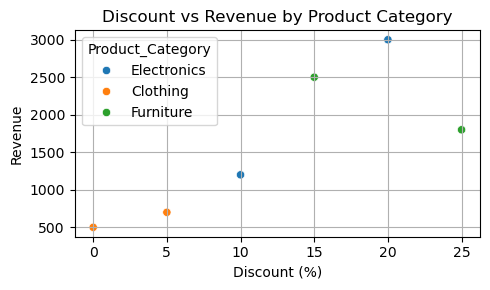

In [88]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Discount (%)', y='Revenue', hue='Product_Category')
plt.title('Discount vs Revenue by Product Category')
plt.xlabel('Discount (%)')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


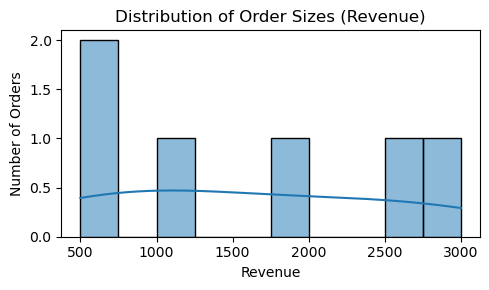

In [89]:
plt.figure(figsize=(5, 3))
sns.histplot(df['Revenue'], bins=10, kde=True)
plt.title('Distribution of Order Sizes (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()
